# Problem identified: Diabetes prediction model


Diabetes is the 4th leading cause of death in the world, yet argueably the most preventitive non-communicable disease  (Type 2). The world health organisation (WHO) has stated there was a globally agreed target to halt diabetes by 2025. However, there are still 830 million people sufferring from diabetes today, and given the nature of diabetes (specifically type 2), it can take a longer time for patients to be diagnosed as symptoms can lie mild for years until there is a sudden decline. 

The problem we are attempting to solve is improving early diagnosis of diabetes amongst patients, in hopes of reversing the decline towards type 2 diabetes. The idea is that the model is used (after being tested vigourously) on patient data to help doctors analyse patient stats and risk factors, to predict pre-diabetes and diabetes much quicker, thus reducing rates of Type 2 diabetes. 

# Dataset Selection and Exploration: why chosen, and how valid is the data?


The data comes from a study by Yin and Xiao-Ping et al (2018) found here: https://bmjopen.bmj.com/content/8/9/e021768.abstract. This was a retrospective study on the association of BMI and Age on diabetes. However, this large dataset consisting of real patient data from a computerized database established by the 'Rich Healthcare Group' in China, covers a large range of indicators to diabetes. The data also covers a range of patient ages from 21-99 years old, and indicators here cover those supplied by WHO for diabetes prevention (e.g, BMI, Blood pressure, Triglyceride, alcohol consumption etc). Therefore, the data seems to be a valid source, with relevant indicators for Diabetes prediction. It is often imperative that real patient data is used for medical diagnosis ML models given the reliability to real life. The indicators within the dataset with acronyms are summarised below for the readers understanding:

- BMI = Body Mass Index
- SBP = Systolic Blood Pressure
- DBP = Diastolic Blood Pressure

Blood test values:

- FPG = Fasting Plasma Glucose (blood sugar level test after fasting 8 hours)
- HDL = High Density Lipoprotein (a type of good cholesterol- data measures its levels)
- LDL= Low Density Lipoprotein (a type of bad cholesterol- data measures its levels)
- ALT= Alanine Aminotransferase Liver enzyme ( data measures its levels in blood tests)
- BUN= Blood Urea Nitrogen (measurement of the amount of urea nitrogen in your blood)
- CCR= Creatine Clearance Rate (Levels of kidney funtioning based on waste product filtration)

Based on research, all the features included in the dataset show moderate-high correlation to Diabetes- whether this dataset will reflect that will be shown in the exploration and eventual model creation. 


# Data Preprocessing

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
import os
print(os.path.exists('RC_Health_Care.csv'))
## Checking the file exists

True


In [8]:
Diabetes_df = pd.read_csv('RC_Health_Care.csv')
Diabetes_df.head()
# Using Pandas to open the file and read data to see if it has been pulled in correctly

,id,Age (y),"Gender(1, male; 2, female)",site,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),...,AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),"Diabetes diagnosed during followup（1,Yes）","censor of diabetes at followup(1, Yes; 0, No)",year of followup,"smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"
0,1,43,2,16,166.4,53.5,19.3,96.0,57.0,4.99,...,NaN,3.08,50.3,4.97,NaN,0,2.151951,3.0,3.0,1
1,2,34,1,2,169.0,57.0,20.0,124.0,69.0,3.51,...,NaN,6.13,83.7,5.50,NaN,0,3.969884,NaN,NaN,0
2,3,32,2,2,157.0,51.0,20.7,98.0,68.0,4.25,...,19.5,4.45,42.8,4.90,NaN,0,3.939767,NaN,NaN,0
3,11,59,1,2,165.0,63.0,23.1,136.0,73.0,5.70,...,NaN,5.76,62.6,5.50,NaN,0,2.184805,3.0,3.0,0
4,14,30,2,9,163.5,48.5,18.1,107.0,76.0,4.42,...,19.9,2.51,48.9,4.82,NaN,0,2.026010,NaN,NaN,0


In [9]:
Diabetes_df.shape
# Dataset appears to be quite large- which is what we want for ML models

(211833, 25)

In [23]:
column_list = Diabetes_df.columns.tolist()
print("\n".join(column_list))
# Getting list of columns to see how many indicators we are working with (

id
Age (y)
Gender(1, male; 2, female)
site
height(cm)
weight(kg)
BMI(kg/m2)
SBP(mmHg)
DBP(mmHg)
FPG (mmol/L)
Cholesterol(mmol/L)
Triglyceride(mmol/L)
HDL-c(mmol/L)
LDL(mmol/L)
ALT(U/L)
AST(U/L)
BUN(mmol/L)
CCR(umol/L)
FPG of final visit(mmol/L)
Diabetes diagnosed during followup（1,Yes）
censor of diabetes at followup(1, Yes; 0, No)
year of followup
smoking status(1,current smoker;2, ever smoker;3,never smoker)
drinking status(1,current drinker;2, ever drinker;3,never drinker)
family histroy of diabetes(1,Yes;0,No)


In [46]:
# We are going to rename columns as some are too lengthy, contain spelling mistakes and/or spaces.  
Diabetes_df.rename(columns={'FPG of final visit(mmol/L)': 'FPG_Final',
                            'Age (y)':'Age',
                            'Gender(1, male; 2, female)':'Gender',
                            'FPG (mmol/L)':'FPG(mmol/L)',
                            'HDL-c(mmol/L)':'HDL(mmol/L)',
                            'FPG of final visit(mmol/L)':'FPG_final(mmol/L)',
                            'Diabetes diagnosed during followup（1,Yes）':'Diabetes_Diagnosed',
                            'censor of diabetes at followup(1, Yes; 0, No)':'Censor_Diabetes_Diagnosed',
                            'year of followup': 'Year_of_followup',
                            'smoking status(1,current smoker;2, ever smoker;3,never smoker)' : 'Smoking_status',
                            'drinking status(1,current drinker;2, ever drinker;3,never drinker)':'Drinking_status',
                            'family histroy of diabetes(1,Yes;0,No)': ' Family_history_diabetes'
                            
                        }, inplace=True)




In [44]:
# We can see some null values. Lets see where these exist and fix these
Diabetes_df[Diabetes_df.isnull().any(axis=1)]
# Interestingly here we see alot of rows contain nullls (There are 211833 rows in total!)
# Lets see where majority of these lie

,id,Age,Gender,site,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG(mmol/L),...,AST(U/L),BUN(mmol/L),CCR(umol/L),FPG_Final,"Diabetes diagnosed during followup（1,Yes）",Censor_Diabetes_Diagnosed,Year_of_followup,Smoking_status,Drinking_status,Family_history_diabetes
0,1,43,2,16,166.4,53.5,19.3,96.0,57.0,4.99,...,NaN,3.08,50.3,4.97,NaN,0,2.151951,3.0,3.0,1
1,2,34,1,2,169.0,57.0,20.0,124.0,69.0,3.51,...,NaN,6.13,83.7,5.50,NaN,0,3.969884,NaN,NaN,0
2,3,32,2,2,157.0,51.0,20.7,98.0,68.0,4.25,...,19.5,4.45,42.8,4.90,NaN,0,3.939767,NaN,NaN,0
3,11,59,1,2,165.0,63.0,23.1,136.0,73.0,5.70,...,NaN,5.76,62.6,5.50,NaN,0,2.184805,3.0,3.0,0
4,14,30,2,9,163.5,48.5,18.1,107.0,76.0,4.42,...,19.9,2.51,48.9,4.82,NaN,0,2.026010,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211828,685268,41,1,2,164.0,66.0,24.5,131.0,92.0,4.68,...,25.1,3.38,71.3,5.66,NaN,0,4.071184,NaN,NaN,0
211829,685270,31,2,5,153.0,44.0,18.8,100.0,62.0,4.73,...,18.0,NaN,55.0,5.20,NaN,0,3.950719,NaN,NaN,0
211830,685274,30,2,2,167.0,48.0,17.1,119.0,79.0,4.87,...,18.9,4.68,63.6,4.60,NaN,0,2.973306,NaN,NaN,0
211831,685276,43,1,5,170.0,74.0,25.6,120.0,69.0,5.83,...,20.0,4.90,77.0,5.97,NaN,0,2.015058,NaN,NaN,0


In [49]:
Diabetes_df.isnull().sum()
# The Diabetes diagnosed columns seems to be compeltely empty. However, given the research and context behind the study- it seems this may be an error column
# In reality, it is the 'Censor_Diabetes_Diagnosed column that contains the Y value data (e.g., whether the patients had diabetes or not.)

id                                0
Age                               0
Gender                            0
site                              0
height(cm)                        2
weight(kg)                        0
BMI(kg/m2)                        0
SBP(mmHg)                        23
DBP(mmHg)                        24
FPG(mmol/L)                       0
Cholesterol(mmol/L)            4854
Triglyceride(mmol/L)           4887
HDL(mmol/L)                   94562
LDL(mmol/L)                   93421
ALT(U/L)                       1782
AST(U/L)                     123290
BUN(mmol/L)                   21551
CCR(umol/L)                   11175
FPG_Final                        19
Diabetes_Diagnosed           210529
Censor_Diabetes_Diagnosed         0
Year_of_followup                  0
Smoking_status               151603
Drinking_status              151603
 Family_history_diabetes          0
dtype: int64

In [99]:
# The executive descision is: to delete the majorly null column 'Diabetes diagnosed' 
# We are also not interested in the 'site' where the blood tests were completed nor the 'year of followup', and thus will be getting rid of the column- reason for getting rid of is because ti is not direct
# medical data we want. 
Cleaned_Diabetes_df= Diabetes_df.drop('site', axis=1)
Cleaned_Diabetes_df= Diabetes_df.drop('Year_of_followup', axis=1)
Cleaned_Diabetes_df= Diabetes_df.drop('Diabetes_Diagnosed', axis=1)
Cleaned_Diabetes_df.head()

,id,Age,Gender,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG(mmol/L),Cholesterol(mmol/L),...,LDL(mmol/L),ALT(U/L),AST(U/L),BUN(mmol/L),CCR(umol/L),FPG_Final,Censor_Diabetes_Diagnosed,Smoking_status,Drinking_status,Family_history_diabetes
0,1,43,2,166.4,53.5,19.3,96.0,57.0,4.99,5.13,...,NaN,10.0,NaN,3.08,50.3,4.97,0,3.0,3.0,1
1,2,34,1,169.0,57.0,20.0,124.0,69.0,3.51,4.61,...,3.13,29.1,NaN,6.13,83.7,5.50,0,NaN,NaN,0
2,3,32,2,157.0,51.0,20.7,98.0,68.0,4.25,4.73,...,NaN,6.9,19.5,4.45,42.8,4.90,0,NaN,NaN,0
3,11,59,1,165.0,63.0,23.1,136.0,73.0,5.70,4.50,...,2.80,15.0,NaN,5.76,62.6,5.50,0,3.0,3.0,0
4,14,30,2,163.5,48.5,18.1,107.0,76.0,4.42,3.48,...,1.43,12.0,19.9,2.51,48.9,4.82,0,NaN,NaN,0


We will _Average fill_ the null columns in the rest of the table. This is to maintain a larger dataset. 
### Important note: 
I tested removing all rows with null data, leaving us with 12609 rows. However, the same correlations remained when I began data exploration, and thus I chose to stick with using average filling as there was virtually no difference in correlations made and the basis of an ML project would prefer a larger dataset. This removal of null values is in another file.


In [122]:

columns_to_fill = [
    'Cholesterol(mmol/L)', 'Triglyceride(mmol/L)', 'HDL(mmol/L)', 'LDL(mmol/L)', 
    'ALT(U/L)', 'AST(U/L)', 'BUN(mmol/L)', 'CCR(umol/L)', 
    'SBP(mmHg)', 'DBP(mmHg)', 'FPG_Final', 'height(cm)'
]

Cleaned_Diabetes_df.update(Cleaned_Diabetes_df[columns_to_fill].fillna(Cleaned_Diabetes_df.mean()))

Cleaned_Diabetes_df.head()


,id,Age,Gender,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG(mmol/L),Cholesterol(mmol/L),...,LDL(mmol/L),ALT(U/L),AST(U/L),BUN(mmol/L),CCR(umol/L),FPG_Final,Censor_Diabetes_Diagnosed,Smoking_status,Drinking_status,Family_history_diabetes
0,1,43,2,166.4,53.5,19.3,96.0,57.0,4.99,5.13,...,2.768231,10.0,24.084889,3.08,50.3,4.97,0,3.0,3.0,1
1,2,34,1,169.0,57.0,20.0,124.0,69.0,3.51,4.61,...,3.130000,29.1,24.084889,6.13,83.7,5.50,0,NaN,NaN,0
2,3,32,2,157.0,51.0,20.7,98.0,68.0,4.25,4.73,...,2.768231,6.9,19.500000,4.45,42.8,4.90,0,NaN,NaN,0
3,11,59,1,165.0,63.0,23.1,136.0,73.0,5.70,4.50,...,2.800000,15.0,24.084889,5.76,62.6,5.50,0,3.0,3.0,0
4,14,30,2,163.5,48.5,18.1,107.0,76.0,4.42,3.48,...,1.430000,12.0,19.900000,2.51,48.9,4.82,0,NaN,NaN,0


In [123]:
Cleaned_Diabetes_df.isnull().sum()

id                                0
Age                               0
Gender                            0
height(cm)                        0
weight(kg)                        0
BMI(kg/m2)                        0
SBP(mmHg)                         0
DBP(mmHg)                         0
FPG(mmol/L)                       0
Cholesterol(mmol/L)               0
Triglyceride(mmol/L)              0
HDL(mmol/L)                       0
LDL(mmol/L)                       0
ALT(U/L)                          0
AST(U/L)                          0
BUN(mmol/L)                       0
CCR(umol/L)                       0
FPG_Final                         0
Censor_Diabetes_Diagnosed         0
Smoking_status               151603
Drinking_status              151603
 Family_history_diabetes          0
dtype: int64

In [ ]:
# Now we have our numeric value data fixed with average filling! I will delete values where there is NaN in the binary columns (e.g., whethere the patient was a smoker or drinker (0-1 values). This should
# Still leave us with 60230 rows of data (211833-151603 = Number of columns in df- number of nan columns in df)

In [124]:
Final_df=Cleaned_Diabetes_df.dropna(subset=['Smoking_status', 'Drinking_status'])
Final_df.isnull().sum()

id                           0
Age                          0
Gender                       0
height(cm)                   0
weight(kg)                   0
BMI(kg/m2)                   0
SBP(mmHg)                    0
DBP(mmHg)                    0
FPG(mmol/L)                  0
Cholesterol(mmol/L)          0
Triglyceride(mmol/L)         0
HDL(mmol/L)                  0
LDL(mmol/L)                  0
ALT(U/L)                     0
AST(U/L)                     0
BUN(mmol/L)                  0
CCR(umol/L)                  0
FPG_Final                    0
Censor_Diabetes_Diagnosed    0
Smoking_status               0
Drinking_status              0
 Family_history_diabetes     0
dtype: int64

In [125]:
Final_df.to_csv('Final_diabetes.csv', index=False)
# We will now use this final dataframe for our analysis and eventual ML model!

# Exploratory data analysis

In [3]:
# We will import the new dataframe:
Final_df = pd.read_csv('Final_diabetes.csv')
Final_df.head()

,id,Age,Gender,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG(mmol/L),Cholesterol(mmol/L),...,LDL(mmol/L),ALT(U/L),AST(U/L),BUN(mmol/L),CCR(umol/L),FPG_Final,Censor_Diabetes_Diagnosed,Smoking_status,Drinking_status,Family_history_diabetes
0,1,43,2,166.4,53.5,19.3,96.0,57.0,4.99,5.13,...,2.768231,10.0,24.084889,3.080000,50.3,4.97,0,3.0,3.0,1
1,11,59,1,165.0,63.0,23.1,136.0,73.0,5.70,4.50,...,2.800000,15.0,24.084889,5.760000,62.6,5.50,0,3.0,3.0,0
2,34,31,1,161.5,58.5,22.4,104.0,74.0,5.78,4.48,...,2.768231,23.6,24.084889,6.820000,96.5,5.10,0,3.0,3.0,0
3,53,25,2,157.0,50.0,20.3,102.0,60.0,5.70,4.05,...,2.768231,13.2,24.084889,4.657683,51.2,4.85,0,3.0,3.0,0
4,59,66,1,156.0,60.5,24.9,133.0,78.0,5.80,4.67,...,2.320000,23.8,28.900000,6.600000,89.8,6.31,0,1.0,3.0,0


In [8]:
# Lets find some summary statistics:

# Final_df.shape # We have dataset of 60,230 rows and 22 columns. 
Final_df.describe()


,id,Age,Gender,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG(mmol/L),Cholesterol(mmol/L),...,LDL(mmol/L),ALT(U/L),AST(U/L),BUN(mmol/L),CCR(umol/L),FPG_Final,Censor_Diabetes_Diagnosed,Smoking_status,Drinking_status,Family_history_diabetes
count,60230.000000,60230.000000,60230.000000,60230.000000,60230.000000,60230.000000,60230.000000,60230.000000,60230.000000,60230.000000,...,60230.000000,60230.000000,60230.000000,60230.000000,60230.000000,60230.000000,60230.000000,60230.000000,60230.000000,60230.000000
mean,343471.037390,41.475577,1.349510,167.263691,65.759201,23.397594,119.428678,74.704677,4.962775,4.714410,...,2.754132,25.130184,24.474279,4.653125,71.731524,5.172201,0.019459,2.556550,2.806442,0.050340
std,198014.695264,12.545170,0.476819,8.254232,12.191577,3.341756,15.603638,10.343115,0.622630,0.882242,...,0.512762,21.806716,6.480610,1.110033,14.761458,0.654314,0.138132,0.804845,0.448283,0.218648
min,1.000000,20.000000,1.000000,119.300000,32.000000,15.000000,72.000000,40.000000,0.590000,0.040000,...,0.010000,0.400000,0.000000,0.900000,27.700000,3.250000,0.000000,1.000000,1.000000,0.000000
25%,171671.750000,32.000000,1.000000,161.000000,56.500000,20.900000,108.000000,67.000000,4.570000,4.100000,...,2.600000,13.400000,24.084889,3.900000,60.700000,4.800000,0.000000,3.000000,3.000000,0.000000
50%,344167.500000,38.000000,1.000000,167.500000,65.000000,23.200000,118.000000,74.000000,4.970000,4.670000,...,2.768231,19.100000,24.084889,4.657683,71.200000,5.100000,0.000000,3.000000,3.000000,0.000000
75%,515254.750000,49.000000,2.000000,173.000000,73.900000,25.500000,129.000000,81.000000,5.350000,5.230000,...,2.770000,29.000000,24.084889,5.240000,81.900000,5.420000,0.000000,3.000000,3.000000,0.000000
max,685286.000000,95.000000,2.000000,198.000000,141.000000,46.300000,213.000000,150.000000,6.990000,13.230000,...,9.310000,722.300000,260.900000,15.420000,274.200000,20.600000,1.000000,3.000000,3.000000,1.000000


It seems the mean BMI of those tested was 23.4, an average BMI rate. The ages left here range from 20-95, showing a wider variety- though perhaps not as reflective on children- the applicability of the model onto real life patient data thus may be limited to adults. 
Of the blood test data (for reference, those ending in mmol/L and U/L) there seems to be large variations between the min and max values- showing a wide spread of data, which could suggest the presence of outliers. 

### Correlations, Trends and Outliers

###### We are interested in the correlation of these indicators to our target variable: the diabeters traccker column (Censor_Diabetes_Diagnosed)

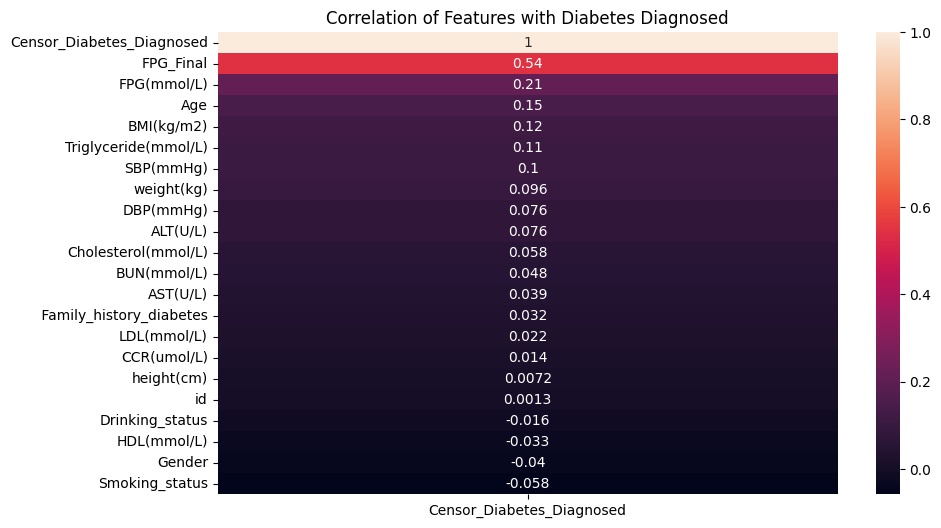

In [22]:
correlation_matrix= Final_df.corr()['Censor_Diabetes_Diagnosed'].sort_values(ascending=False)
plt.figure(figsize= (10,6))
sns.heatmap(data= correlation_matrix.to_frame(), annot = True)
plt.title(f"Correlation of Features with Diabetes Diagnosed")
plt.show()

### Negatively correlated values
We see clearly that majority of values are negatively correlated to diabetes being diagnosed
specifically smoking status. As the "non-smoker" value decreases (meaning they are more likely a smoker), the likelihood of having diabetes increases.
The values in the smoker column range from 1,current smoker;2, have ever smoked ;3,never smoked). Thus showing preliminary evidence that smoking increases risk fo diabetes.

This negative correlation stays with Gender (1 being male, 2 being female) , HDL(mmol/L) and drinking status (1 being current drinker;2, have ever drank ;3,never drank). Thus based on these relatively weak correlations males are more succeptible to diabetes than females, a lower HDL(mmol/L) and being a drinker of alcohol is linked to increase risk of diabetes.However, we cannot conclude these values since the correlations are so weak
### Positively correlated values
We see weak correlations with the remainder of blood test values. However, there is a moderate correlation between the FPG_Final and diabetes occurrence. 


Text(0.5, 1.0, ' Histogram of FPG_Final: distribution')

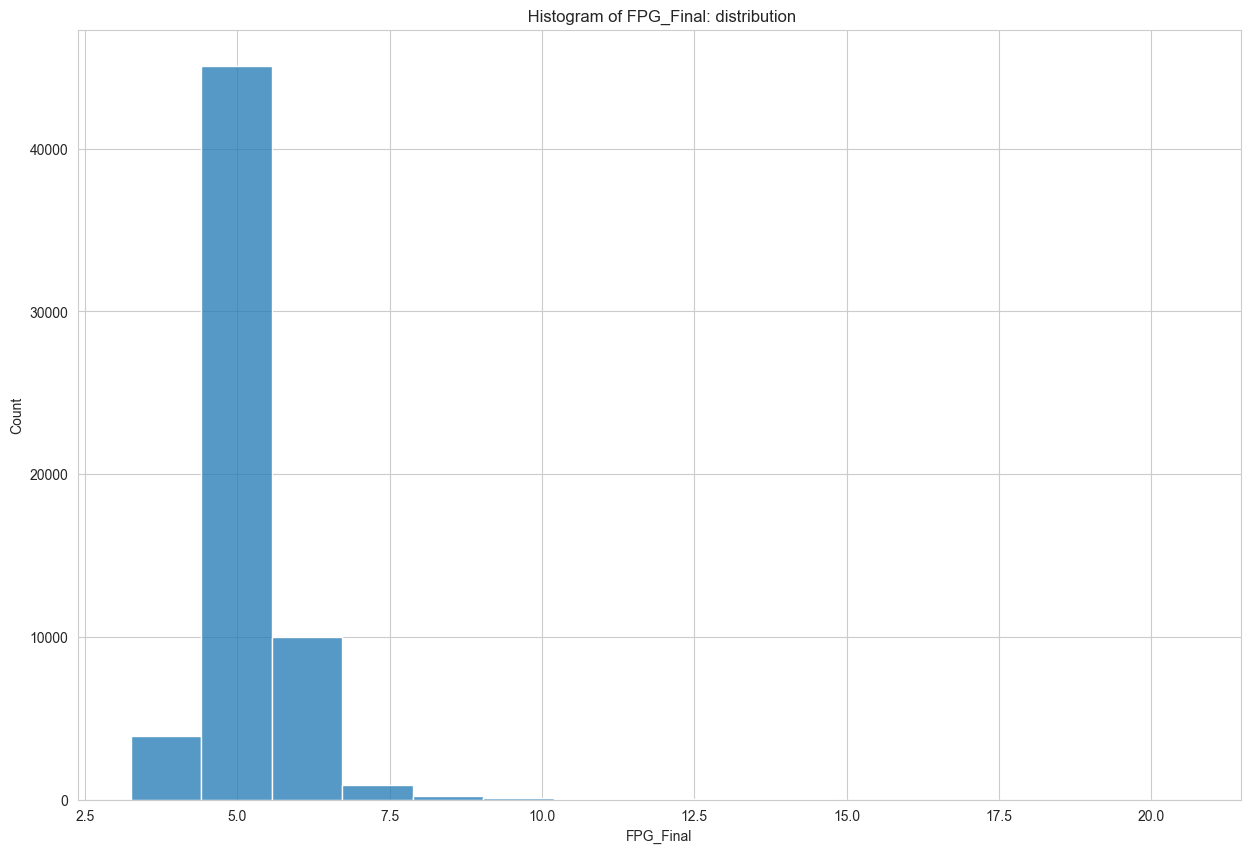

In [47]:
# lets see the distribution of values for our continuous value of interest: FPG_Final
plt.figure(figsize = (15,10)) # matplotlib
sns.histplot(Final_df['FPG_Final'], bins = 15)
plt.title(' Histogram of FPG_Final: distribution')

There seems to be quite a lot of columns close to the value of 5.0 mmol/L of FPG_Final, indicating the values for fFPG_Final are not as varied- though it is within this variation of extremes that we could find predictors of diabetes.  

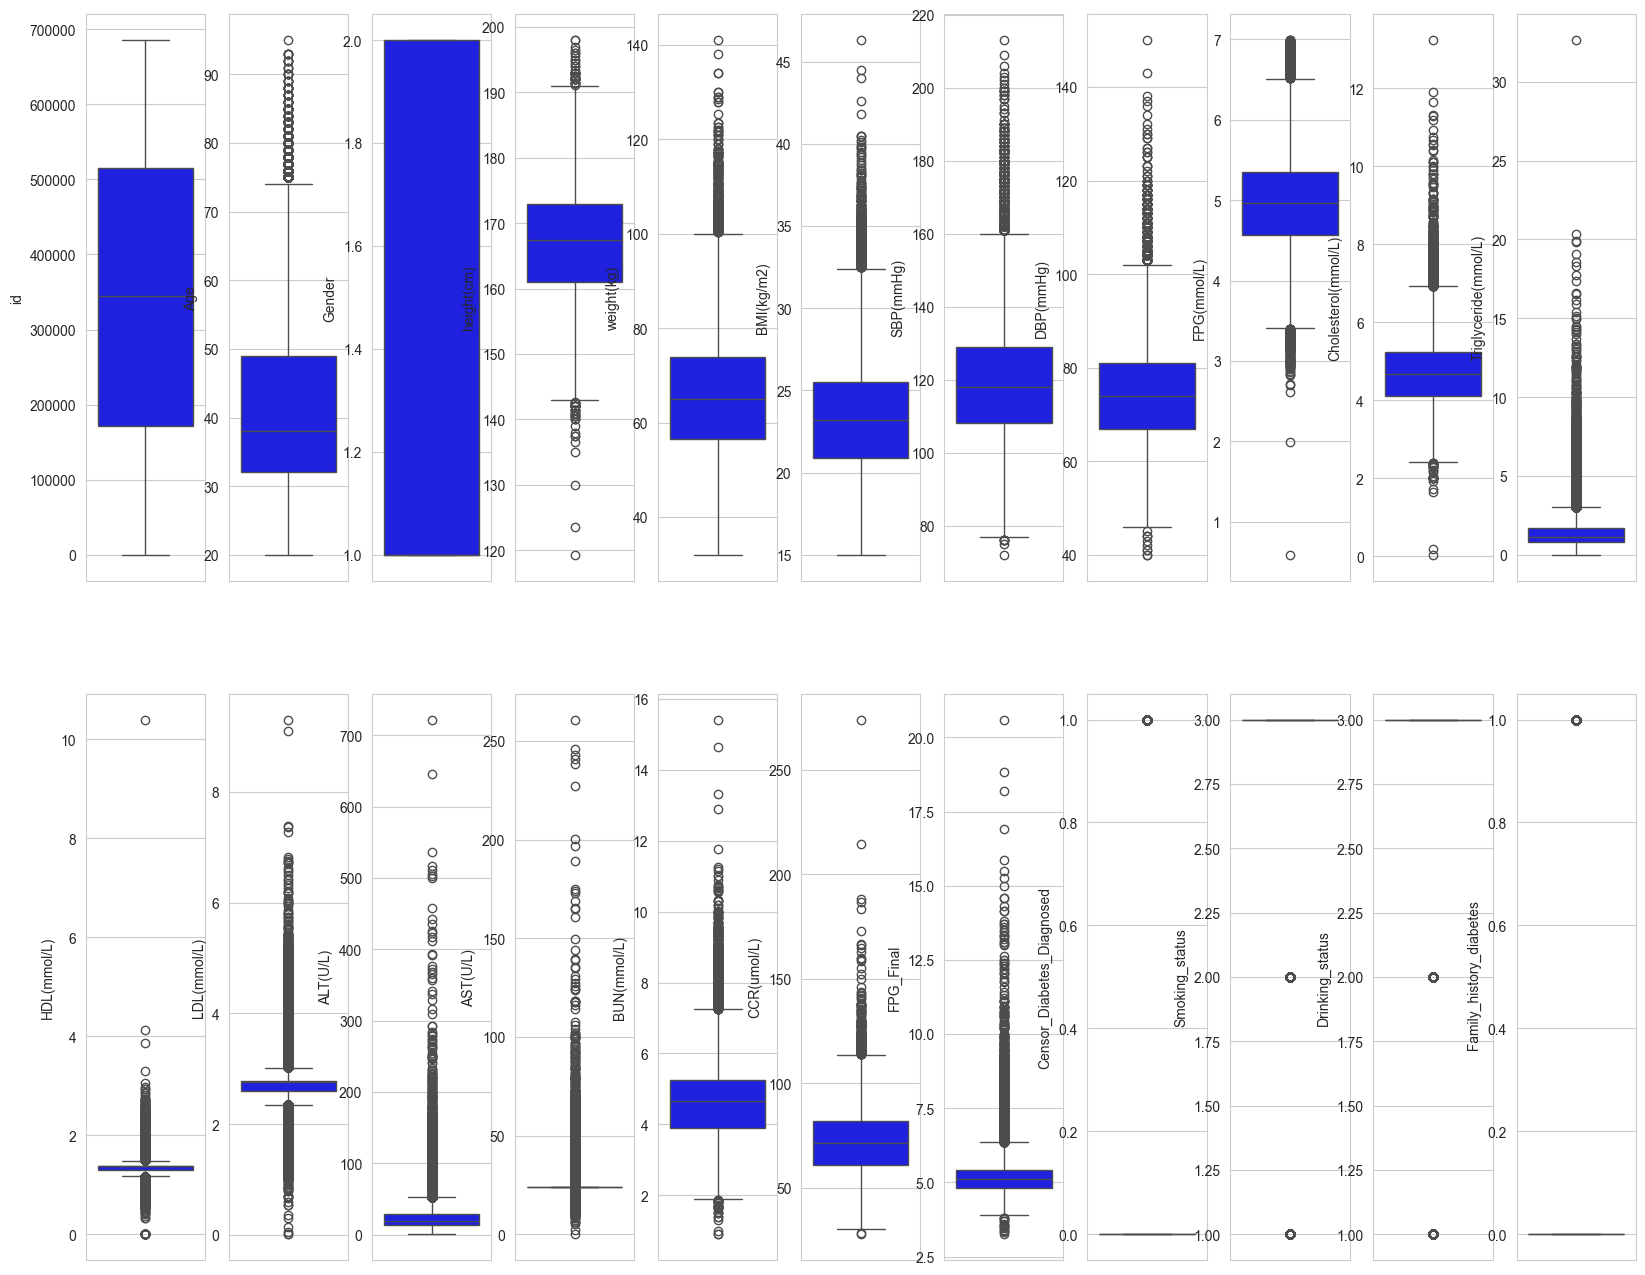

In [42]:
l = Final_df.columns.values
number_of_columns=11
number_of_rows = round((len(l) - 1) / number_of_columns)


plt.figure(figsize= (20,25))
           # (number_of_columns,5*number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(Final_df[l[i]],color='blue',orient='v')

Based on the boxplots of all features, there are a lot of outliers across all features, excluding: age, height, and the choice field columns of 'Smoking_status, 'drinking_status', and 'family_history_diabetes'. This can be seen as worrying since there is such a large number of outliers beyond the normal spread of data. However, the context is that these are medical results. Thus it is likely that there will be values (e.g., like Cholesterol(mmol/L) that go beyond the standard values. As explained above, when analysing the min and max values for the various blood test values, it seems they are physically possible- thus we should assume the outliers are reflective. In the study where the data originates from, Xing and Xiao-ping(2018) note that the data was "collected under standardised conditions and followed according to uniform procedures
by trained staff." Thus we cannot claim this data to be erroneous- it may divert from the common data values but these measurements still occurred.

Whether the outliers will be kept or not will depend on model performance, but commonly Tree-based models (Decision Trees, Random Forests, Gradient Boosting, XGBoost) are generally robust to outliers because they focus on splitting data into regions, and extreme values are unlikely to affect the overall structure unless the tree is too deep. We will focus on these for the model creation.


# Final notes on exploratory analysis:


It is dissapointing we do not see higher correlations within the data to our target variable. 'Censor_Diabetes_diagnosed'- however this has heavily influenced our model algorithm choice. We can still build a model on it using more suited ML algorithms (e.g., Tree-based models)- so whilst linear regression would work poorly, a tree-based model can see relationships between features (interaction effects). For medical diagnosis prediction, it is often never just one feature that only links to the disease- thus we should utilise all the features available to help build a better image of the predictability of type 2 diabetes. Furthermore given the numerous outliers in the dataset, we must also use tree-based models to help reduce extreme values. Though, the drawbacks here are there is a higher chance of overfitting- these will have to be mitigated.